<a href="https://colab.research.google.com/github/wel51x/DS-Unit-4-Sprint-3-Neural-Networks/blob/master/My_LS_DS_433_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [0]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.datasets import boston_housing

In [0]:
# load data
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# normalize
X_train = X_train/X_train.max(axis=0)

In [18]:
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((404, 13), (102, 13), (404,), (102,))

In [0]:
X_train[:10]

In [20]:
model = Sequential()
model.add(Dense(40, activation='relu', input_shape=(13,)))
model.add(Dense(80, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['mean_squared_error', 'accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 40)                560       
_________________________________________________________________
dense_8 (Dense)              (None, 80)                3280      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 81        
Total params: 3,921
Trainable params: 3,921
Non-trainable params: 0
_________________________________________________________________


In [0]:
fit_history = model.fit(X_train, y_train, epochs=1000, validation_split=0.2, verbose=0)

In [22]:
scores = model.evaluate(X_train, y_train, steps=5000)
i = 0
for item in model.metrics_names:
  print(item + ':')
  print(scores[i])
  i += 1

5000/5000 [==============================] - 3s 690us/step
loss:
8.83533763885498
mean_squared_error:
8.83533763885498
acc:
0.02227722853422165


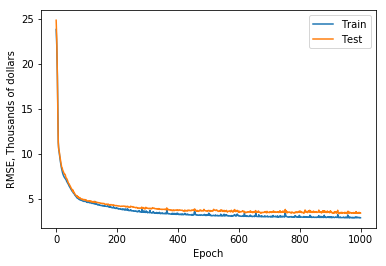

In [24]:
import matplotlib.pyplot as plt
RMSE_train = np.sqrt(fit_history.history['mean_squared_error'])
RMSE_test = np.sqrt(fit_history.history['val_mean_squared_error'])
fig, ax = plt.subplots()
ax.plot(RMSE_train, label = 'Train')
ax.plot(RMSE_test, label = 'Test')
ax.set_xlabel('Epoch')
ax.set_ylabel('RMSE, Thousands of dollars')
plt.legend()
plt.show()

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [25]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
X_train = X_train.reshape(60000, 784).astype('float32') /255
X_test = X_test.reshape(10000, 784).astype('float32') /255

In [0]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [28]:
model = Sequential()
model.add(Dense(16,input_shape=(784,), kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                12560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                330       
Total params: 13,434
Trainable params: 13,434
Non-trainable params: 0
_________________________________________________________________


In [0]:
fit_history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

In [30]:
scores = model.evaluate(X_train, y_train, steps=500)
i = 0
for item in model.metrics_names:
  print(item + ':')
  print(scores[i])
  i += 1

500/500 [==============================] - 59s 118ms/step
loss:
0.3580649197101593
acc:
0.8665666580200195


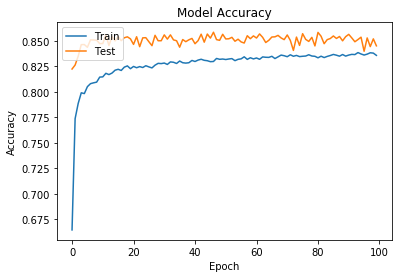

In [33]:
# Plot training & validation accuracy values
plt.plot(fit_history.history['acc'])
plt.plot(fit_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

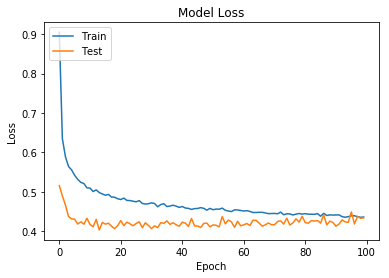

In [34]:
# Plot training & validation loss values
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.